# Моделируем временные ряды по ARIMA

ЗАДАНИЕ 1.

Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os

C:\Users\Windows\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_m = data.resample('M').mean()

In [4]:
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


Text(0.5, 0, 't')

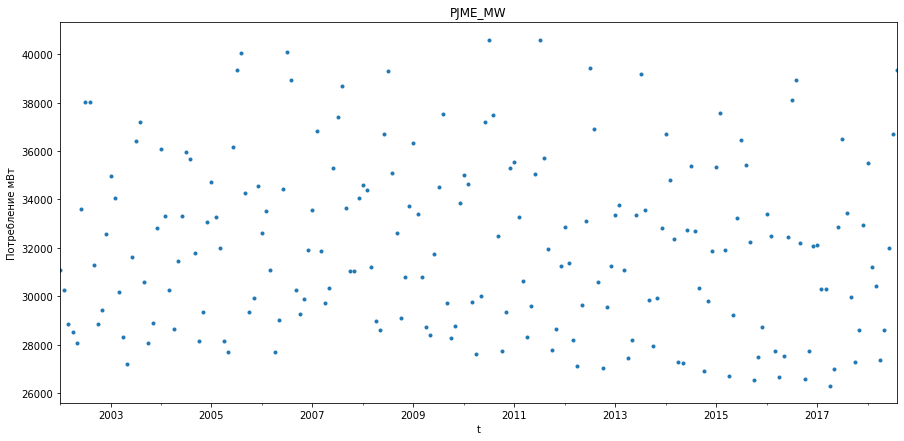

In [5]:

_ = data_m['PJME_MW'].plot( style='.', figsize=( 15, 7 ), title='PJME_MW')
plt.ylabel('Потребление мВт')
plt.xlabel('t')

ЗАДАНИЕ 2.

Подберите параметры модели SARIMAX для этого ряда.

In [6]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from random import random

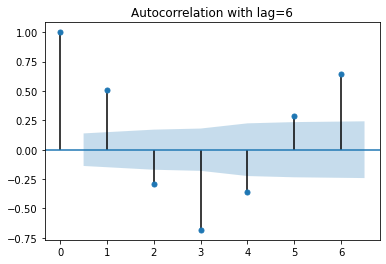

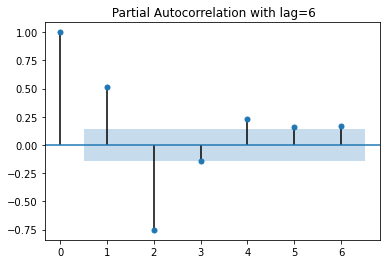

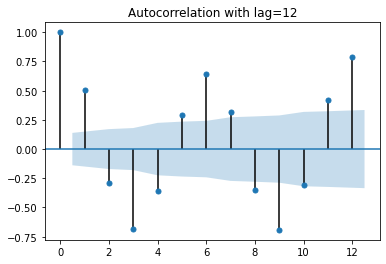

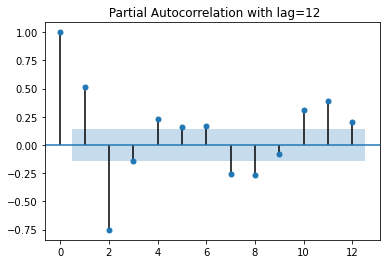

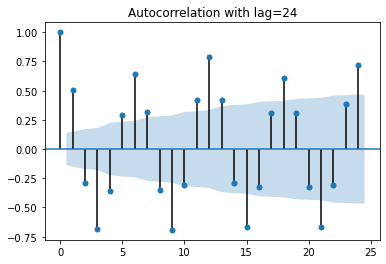

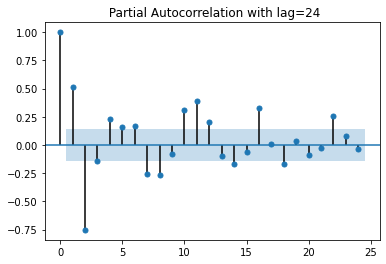

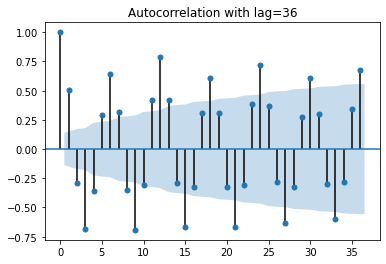

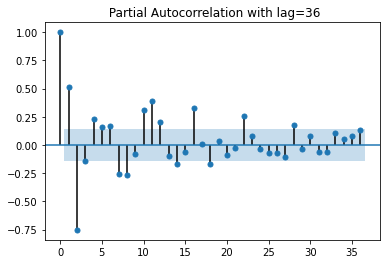

In [8]:
lags_arr=[6,12,24,36]

for lags_item in lags_arr:    
    sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=lags_item)
    plt.title(f'Autocorrelation with lag={lags_item}')
    plt.show()
    sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=lags_item)
    plt.title(f' Partial Autocorrelation with lag={lags_item}')
    plt.show()

Сезонность - 24  - период в ACF . 
qs - ACF,PACF  - синусоида - пишем в сезоны qs = 1 и возможно 2 (qs = [1,2])

ps - быстро убывает PACF - ps не более 3 (ps =[0, 1, 2, 3])

ds - предполагаем (ADF  - на длине 10 лет - стационарный ряд), что ds=0

p - ACF - синусоида (это сезон), PACF - на отрезке убывает (хотя тоже видим сезон) и 2 выделенных корреляциий,
отсюда p - не более 2 p =[0, 1, 2](по PACF)

d - на месячных графиках - по ADF ( должен быть стационарным для больших интервалов и нет для маленьких) - d = [0,1,2]

q - не более 3 (по ACF)



In [10]:
import warnings

# Определим p, d и q 
q = 3
p = 2
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с недельными данными, тогда сезонность это 26 недель
qs = 1
ps = 1
ds = 0
seasonal_pdq = [ps, ds, qs ,24] 


In [11]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [2, 2, 3]    : ps,ds,qs, S= [1, 0, 1, 24]


In [12]:
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[2, 2, 3]x[1, 0, 1, 24] - AIC:2876.6651795745975


In [13]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(2, 2, 3)x(1, 0, 1, 24)   Log Likelihood               -1430.333
Date:                            Sun, 21 Jun 2020   AIC                           2876.665
Time:                                    13:59:38   BIC                           2901.166
Sample:                                         0   HQIC                          2886.615
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

  
Анализ результатов по results:
- коэффициенты при элементах модели имеют большие значения (особенно важны составляющие сглаживания coef: ar.L1,ma.L1, ma.L2, ar.S.L24,ma.S.L24 )
- можно посмотреть на остатки ряда (results.resid) с точки зрения автокорреляции и убедиться, что они не имеют значительной корреляции 

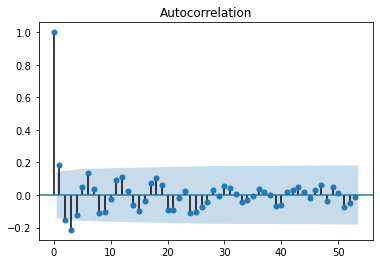

In [14]:
sm.graphics.tsa.plot_acf(results.resid, lags=53)
plt.show()

Оценим близости распределений остатков модели к нормальному закону используя визуализацию plot_diagnostics: 

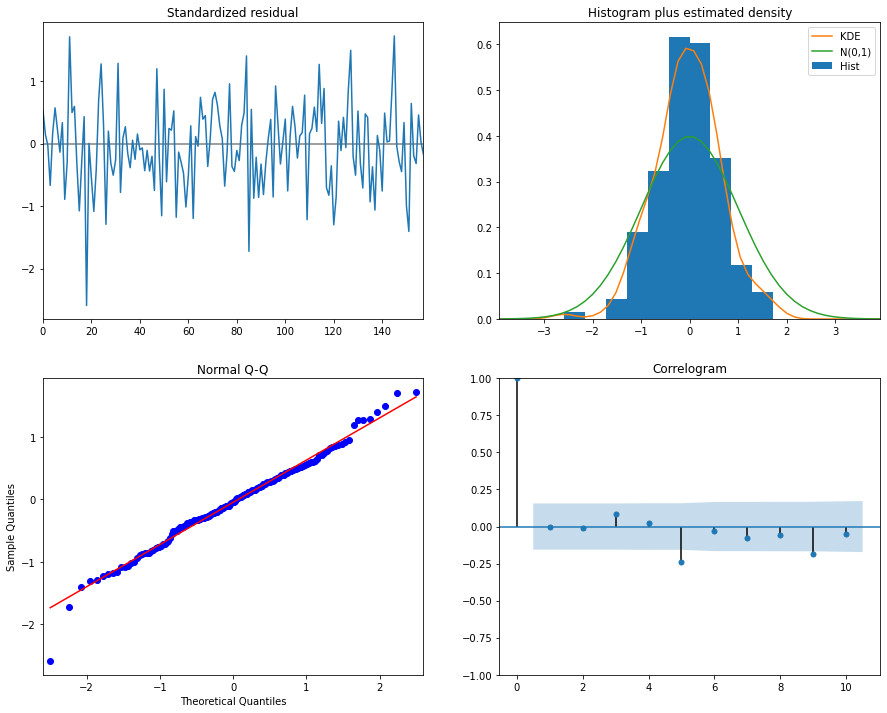

In [15]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

В этом случае диагностика показала, что остатки модели правильно распределяются:
- estimated density на верхнем-правом графике красная линия KDE находится близко к линии N (0,1) (где N (0,1) является стандартным обозначением нормального распределения со средним 0 и стандартным отклонением 1) . Очевидно, что остатки нормально распределены.
- График q-q в левом нижнем углу показывает, что упорядоченное распределение остатков (синие точки) следует линейному тренду выборок, взятых из стандартного распределения N (0, 1). Опять же, это признак того, что остатки нормально распределены.
- Остатки с течением времени (верхний левый график) не показывают явной сезонности и кажутся белыми шумами. Это подтверждается графиком автокорреляции (внизу справа), который показывает, что остатки временных рядов имеют низкую корреляцию с запаздывающими данными.

Эти графики позволяют сделать вывод о том, что выбранная модель (удовлетворительно) подходит для анализа и прогнозирования данных временных рядов.

**Подбор параметров**

In [18]:
import itertools

# Определим p, d и q 
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0,1,2] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 0, 0, 24)
SARIMAX: (0, 0, 2) x (0, 0, 0, 24)
SARIMAX: (0, 0, 2) x (0, 0, 1, 24)


In [19]:
data_m['PJME_MW'].values.shape

(200,)

In [22]:
print(pdq)
print('-----------------------------------')
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]
-----------------------------------
[(0, 0, 0, 24), (0, 0, 1, 24), (0, 0, 2, 24), (0, 1, 0, 24), (0, 1, 1, 24), (0, 1, 2, 24), (1, 0, 0, 24), (1, 0, 1, 24), (1, 0, 2, 24), (1, 1, 0, 24), (1, 1, 1, 24), (1, 1, 2, 24), (2, 0, 0, 24), (2, 0, 1, 24), (2, 0, 2, 24), (2, 1, 0, 24), (2, 1, 1, 24), (2, 1, 2, 24)]


In [23]:
warnings.filterwarnings("ignore") # отключает предупреждения

aic_arr=[]
pdq_map={}
seasonal_pdq_map={}
i=0
print('print first 10 values')
for param in pdq:    
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            if i < 10:
                print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic_arr.append(results.aic)
            pdq_map[results.aic]=param
            seasonal_pdq_map[results.aic]=param_seasonal
            i+=1
        except:
            continue
print('-----------------------------------------------------------------')
print(min(aic_arr))
print(pdq_map[min(aic_arr)])
print(seasonal_pdq_map[min(aic_arr)])

print first 10 values
ARIMA(0, 0, 0)x(0, 0, 0, 24)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 24)3 - AIC:3739.6561215158144
ARIMA(0, 0, 0)x(0, 0, 2, 24)3 - AIC:5454.360399378247
ARIMA(0, 0, 0)x(0, 1, 0, 24)3 - AIC:2971.5668206658843
ARIMA(0, 0, 0)x(0, 1, 1, 24)3 - AIC:2522.8166852431705
ARIMA(0, 0, 0)x(0, 1, 2, 24)3 - AIC:4415.866213194323
ARIMA(0, 0, 0)x(1, 0, 0, 24)3 - AIC:2994.862641501906
ARIMA(0, 0, 0)x(1, 0, 1, 24)3 - AIC:2977.8983878212593
ARIMA(0, 0, 0)x(1, 0, 2, 24)3 - AIC:9935.737031057204
ARIMA(0, 0, 0)x(1, 1, 0, 24)3 - AIC:2514.8491839574717
-----------------------------------------------------------------
1999.469310138068
(2, 1, 1)
(2, 1, 1, 24)


#### **Оптимальные параметры**

Лучшие результаты на месячных данных параметры модели SARIMA(2, 1, 1)x(2, 1, 1, 24) - AIC:1999.4693 (для p,q,d,ps,ds,qs из диапазона [0,1,2]).



In [24]:
aic_min=1999.4693 
pdq_opt=[2, 1, 1]
seasonal_pdq_opt=[2, 1, 1, 24]


In [25]:
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения
N1 =0  # берем дданные не от начала - так быстрее работает
N2=12  # число точек для теста
nforecast = N2+30

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[N1:-N2],order=pdq_opt,
                                seasonal_order=seasonal_pdq_opt ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 1999.469310138068


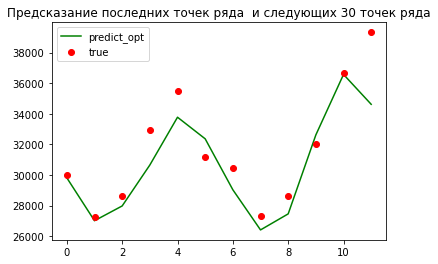

In [26]:
nforecast = N2  # полное число предиктов (тест+ чистый предикт)

#делаем предсказание на 12 точtк от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(nforecast)


plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

In [27]:
results_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.3480,0.099,3.532,0.000,0.155,0.541
ar.L2,0.0192,0.107,0.180,0.857,-0.190,0.229
ma.L1,-1.0000,0.144,-6.937,0.000,-1.282,-0.717
ar.S.L24,-0.1295,0.108,-1.202,0.229,-0.341,0.082
ar.S.L48,0.0395,0.037,1.058,0.290,-0.034,0.113
ma.S.L24,-0.7525,0.091,-8.225,0.000,-0.932,-0.573
sigma2,2.26e+06,6.39e-08,3.53e+13,0.000,2.26e+06,2.26e+06


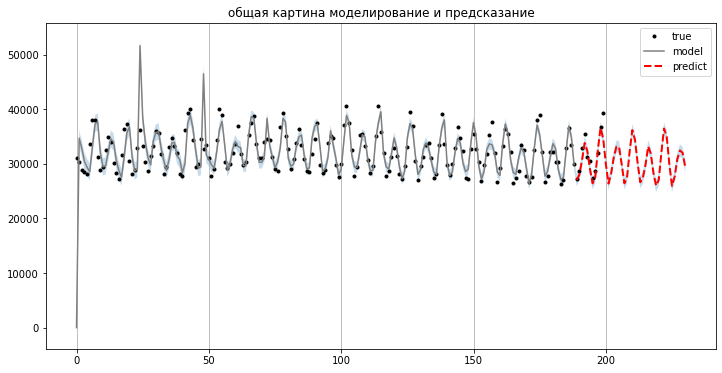

In [28]:
nforecast = N2+30  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-0)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(data_m['PJME_MW'].values[N1:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[0:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[0:, 0], predict_ci[0:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

In [29]:
error_p =np.mean(np.abs(predict_.predicted_mean[-nforecast:]-data_m['PJME_MW'].values[-nforecast:])/data_m['PJME_MW'].values[-nforecast:])*100
print('MAPE :' , error_p)

MAPE : 9.92893387844345


ЗАДАНИЕ 3.

Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Модель немного ухудшилась, но это связано с тем, что для того чтобы подобрать все p, d, q и ps, ds, qs - нужно необходимое множество комбинаций этих значений (полученное на шаге анализа ACF и PACF функций - см. выше) пропустить через "сетку" поиска. В задаче сделано лишь подмножество от необходимого количества комбинаций из-за ограничний по времни. Также месячная модель более грубая оказалась, чем недельная.

ЗАДАНИЕ 4.

Возмите вариант 1 или 2 
Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг) 

In [30]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [31]:
data_w = brent_data.resample('W').mean()

In [32]:
data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


Text(0.5, 0, 't')

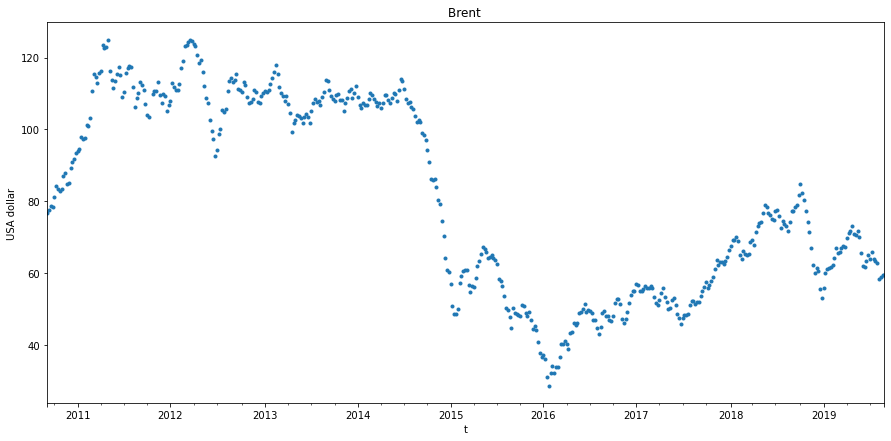

In [33]:
_ = data_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [34]:
data_w.shape[0]

470

In [37]:
# проверим пропуски

In [38]:
data_w['Значение'].isnull().sum()


1

In [65]:
ind= np.where(data_w['Значение'].isnull())
print(ind)

(array([58], dtype=int64),)


In [66]:
data_w[ind[0][0]:ind[0][0]+1]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data_w[ind[0][0]-1:ind[0][0]]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-09,103.476667,2011.0,10.0,5.666667,4.0,278.666667,40.0,2.666667,0.0,0.166667,0.0


In [77]:
#Заполняем пропуск предыдущим значением
data_w[ind[0][0]:ind[0][0]+1].values[0]=data_w[ind[0][0]-1:ind[0][0]].values[0]

In [78]:
data_w[ind[0][0]:ind[0][0]+1]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-16,103.476667,2011.0,10.0,5.666667,4.0,278.666667,40.0,2.666667,0.0,0.166667,0.0


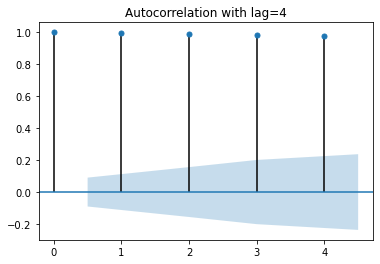

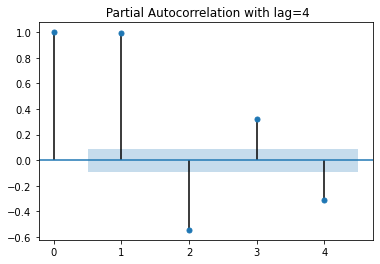

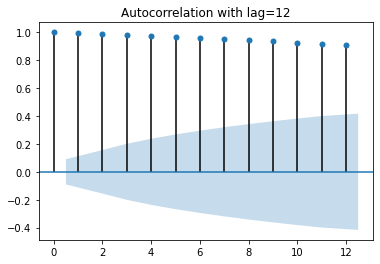

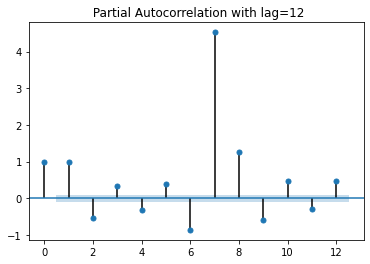

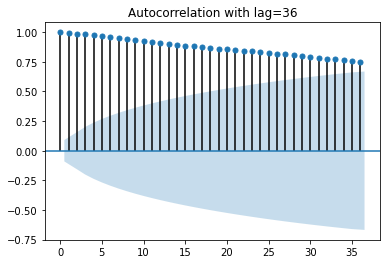

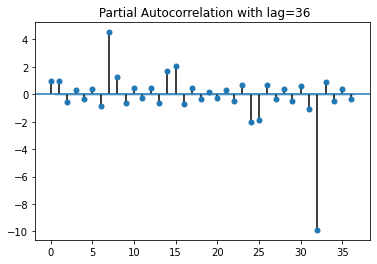

In [79]:
lags_arr=[4,12,36]

for lags_item in lags_arr:    
    sm.graphics.tsa.plot_acf(data_w['Значение'].values, lags=lags_item)
    plt.title(f'Autocorrelation with lag={lags_item}')
    plt.show()
    sm.graphics.tsa.plot_pacf(data_w['Значение'].values, lags=lags_item)
    plt.title(f' Partial Autocorrelation with lag={lags_item}')
    plt.show()

Вывод 

ACF -корреляции медленно уменьшается по недельному рессемплингу.

Сезона нет.

PACF - быстро пададает (не более 3-й корреляций).

Возьмем разницы.

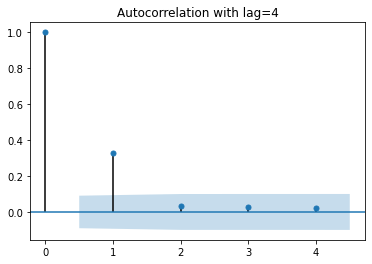

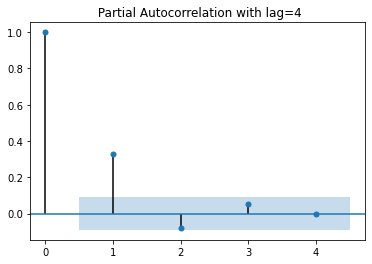

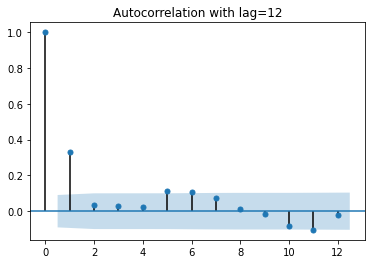

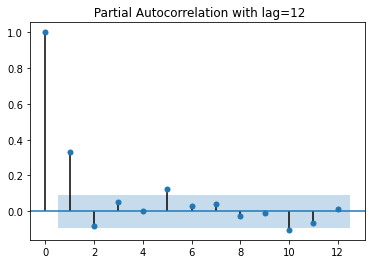

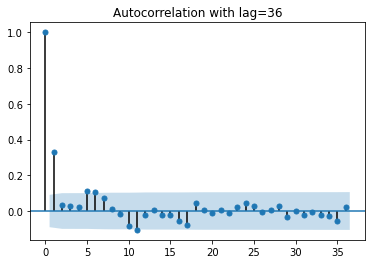

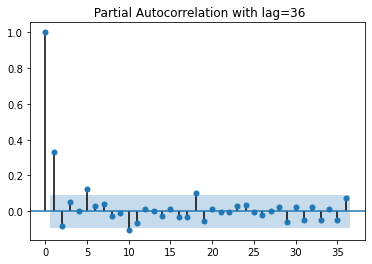

In [80]:
brent_dif = data_w['Значение'].diff(1)

lags_arr=[4,12,36]

for lags_item in lags_arr:    
    sm.graphics.tsa.plot_acf(brent_dif[1:], lags=lags_item)
    plt.title(f'Autocorrelation with lag={lags_item}')
    plt.show()
    sm.graphics.tsa.plot_pacf(brent_dif[1:], lags=lags_item)
    plt.title(f' Partial Autocorrelation with lag={lags_item}')
    plt.show()



## Вывод 

ACF -корреляции падает быстро по разнице 1 порядка по недельному рессемплингу.

Сезона нет.

PACF -  для первых разностей РACF - быстро падает (не более 2-й корреляции).

 - q , p - берем р=1(2) (PACF) , q =1(2) (скорее всего не очень большой после производной)
 - ADF - 1 раз интегрируемый - d = 1 

Запустим модель без сезонного анализа (ARIMA)

In [81]:
# Определим p, d и q 
q = 1
p = 2
d = 1
pdq = [p, d, q]

N2=30
warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(data_w['Значение'].values[:-N2],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 1] - AIC:1915.9758103637882
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  440
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -951.988
Date:                Sun, 21 Jun 2020   AIC                           1915.976
Time:                        16:18:31   BIC                           1940.455
Sample:                             0   HQIC                          1925.636
                                - 440                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

Здесь наибольший к-т - ma.L1 -скользящее среднее

In [90]:
import itertools

# Определим p, d и q 
p = range(0, 4)
d = range(0, 3)
q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q


print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {}'.format(pdq[1]))
print('SARIMAX: {}'.format(pdq[1]))
print('SARIMAX: {}'.format(pdq[2]))
print('SARIMAX: {}'.format(pdq[2]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1)
SARIMAX: (0, 0, 1)
SARIMAX: (0, 0, 2)
SARIMAX: (0, 0, 2)


In [91]:
warnings.filterwarnings("ignore") # отключает предупреждения

aic_arr=[]
pdq_map={}

i=0
print('print first 10 values')
for param in pdq:        
    try:
        mod = sm.tsa.statespace.SARIMAX(data_w['Значение'].values[:-N2],order=param,
                                seasonal_order=[0,0,0,0], trend='ct' ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

        results = mod.fit()
        #if i < 10:
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        aic_arr.append(results.aic)
        pdq_map[results.aic]=param
            
        i+=1
    except:
        continue
print('-----------------------------------------------------------------')
print(min(aic_arr))
print(pdq_map[min(aic_arr)])


print first 10 values
ARIMA(0, 0, 0) - AIC:3805.2622160472483
ARIMA(0, 0, 1) - AIC:3240.40021174139
ARIMA(0, 0, 2) - AIC:2832.1723427137376
ARIMA(0, 1, 0) - AIC:1969.8558796644672
ARIMA(0, 1, 1) - AIC:1913.1138799858713
ARIMA(0, 1, 2) - AIC:1911.4476171725505
ARIMA(0, 2, 0) - AIC:2092.2059213844623
ARIMA(0, 2, 1) - AIC:1966.9653035995645
ARIMA(0, 2, 2) - AIC:1925.8636075730124
ARIMA(1, 0, 0) - AIC:1971.1331406259533
ARIMA(1, 0, 1) - AIC:1914.05106497076
ARIMA(1, 0, 2) - AIC:1912.5156683161872
ARIMA(1, 1, 0) - AIC:1920.2871210702858
ARIMA(1, 1, 1) - AIC:1914.94633764247
ARIMA(1, 1, 2) - AIC:1913.118144869777
ARIMA(1, 2, 0) - AIC:2059.082851769117
ARIMA(1, 2, 1) - AIC:1958.651156480153
ARIMA(1, 2, 2) - AIC:1929.7803716650224
ARIMA(2, 0, 0) - AIC:1916.7097308173115
ARIMA(2, 0, 1) - AIC:1915.6066533448206
ARIMA(2, 0, 2) - AIC:1918.8415636006662
ARIMA(2, 1, 0) - AIC:1915.7990637386442
ARIMA(2, 1, 1) - AIC:1915.9758103637882
ARIMA(2, 1, 2) - AIC:1914.5735227576458
ARIMA(2, 2, 0) - AIC:2011.3

**Оптимальные параметры**

Лучшие результаты на недельных данных параметры модели ARIMA(0, 1, 2) - AIC:1911.45 (для p,q,d из диапазона [0,1,2]).


In [84]:
param_opt=[0,1,2]
mod_opt = sm.tsa.statespace.SARIMAX(data_w['Значение'].values[:-N2],order=param_opt,
                            seasonal_order=[0,0,0,0], trend='ct' ,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

results_opt = mod_opt.fit()
print('ARIMA{} - AIC:{}'.format(param_opt, results_opt.aic))

ARIMA[0, 1, 2] - AIC:1911.4476171725505


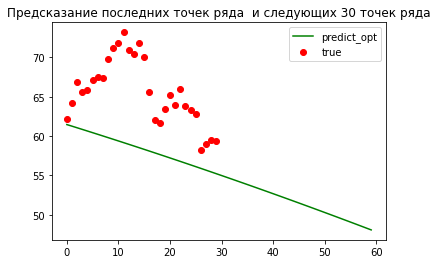

In [85]:
nforecast = N2+30  # полное число предиктов (тест+ чистый предикт)

#делаем предсказание на 12 точек от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(nforecast)


plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_w['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

In [86]:
results_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,0.1295,0.246,0.527,0.598,-0.352,0.611
drift,-0.0008,0.001,-0.682,0.495,-0.003,0.001
ma.L1,0.3660,0.049,7.452,0.000,0.270,0.462
ma.L2,0.0169,0.046,0.370,0.712,-0.073,0.107
sigma2,4.5869,0.258,17.784,0.000,4.081,5.092


Самый существенный к-т - ma.L1 -скользящее среднее

In [87]:
N2

30

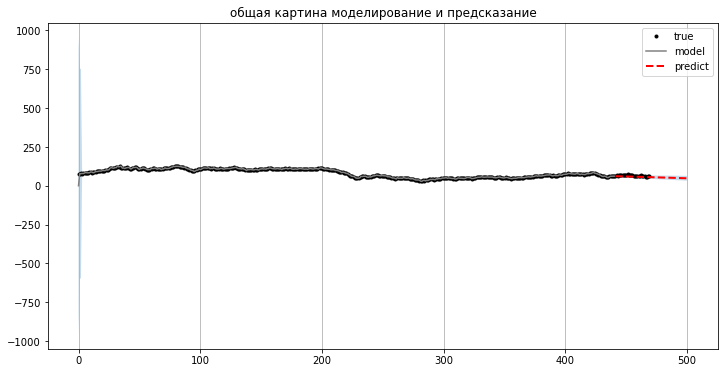

In [88]:
nforecast = N2+30  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean))
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(data_w['Значение'].values[0:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[0:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[0:, 0], predict_ci[0:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

Вывод - модель достаточно неплохая

ЗАДАНИЕ 5.

Оцените результат моделирования

In [89]:
error_p =np.mean(np.abs(predict_.predicted_mean[-nforecast:]-data_w['Значение'].values[-nforecast:])/data_w['Значение'].values[-nforecast:])*100
print('MAPE :' , error_p)

MAPE : 18.913081205920232


MAPE - средняя абсолютная ошибка в процентах=18.94  в принципе неплохо

ЗАДАНИЕ 6.

Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

Судя по моделям, используемым в д.з и на вебинарах лучше работатают с техниками регрессии на основе AR I MA (часть AR) - это модель ARIMA для большого количества данных (более мелкий масштаб - дневной, напр.) и SARIMA для меньшего количества данных - (более крупный масштаб - месячный, напр.)